## 하이퍼파라미터 튜닝

- 모델의 성능을 확보하기 위해 조절하는 설정 값 
- 튜닝 대상
    - 결정나무에서 아직 우리가 튜닝해 볼만한 것은 max_depth이다
    - 간단하게 반복문으로 max_depth를 바꿔가며 테스트해 볼 수 있다

In [1]:
import pandas as pd 

wine = pd.read_csv('/home/kkyu/amr_ws/ML/data/wine.csv', index_col=0)
wine['taste'] = [1. if grade > 5 else 0. for grade in wine ['quality']]

X = wine.drop(['taste', 'quality'], axis = 1)
y = wine['taste']

/tmp/ipykernel_11213/3890080991.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### GridSearchCV

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {'max_depth' : [2, 4, 7, 10]}
wine_tree = DecisionTreeClassifier(max_depth= 2, random_state= 13)

gridsearch = GridSearchCV(estimator=wine_tree, param_grid=params, cv = 5)
gridsearch.fit(X, y)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=2, random_state=13),
             param_grid={'max_depth': [2, 4, 7, 10]})

### GridSearchCV의 결과

In [3]:
import pprint 

pp = pprint.PrettyPrinter(indent = 4)
pp.pprint(gridsearch.cv_results_)

{   'mean_fit_time': array([0.00588226, 0.00845947, 0.0136086 , 0.01879358]),
    'mean_score_time': array([0.00138979, 0.00120749, 0.00115752, 0.00124321]),
    'mean_test_score': array([0.6888005 , 0.66356523, 0.65340854, 0.64401587]),
    'param_max_depth': masked_array(data=[2, 4, 7, 10],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object),
    'params': [   {'max_depth': 2},
                  {'max_depth': 4},
                  {'max_depth': 7},
                  {'max_depth': 10}],
    'rank_test_score': array([1, 2, 3, 4], dtype=int32),
    'split0_test_score': array([0.55230769, 0.51230769, 0.50846154, 0.51615385]),
    'split1_test_score': array([0.68846154, 0.63153846, 0.60307692, 0.60076923]),
    'split2_test_score': array([0.71439569, 0.72363356, 0.68360277, 0.66743649]),
    'split3_test_score': array([0.73210162, 0.73210162, 0.73672055, 0.71054657]),
    'split4_test_score': array([0.75673595, 0.7182448 , 0.73518091, 0.7251732

### 최적의 성능을 가진 모델

In [4]:
gridsearch.best_estimator_

DecisionTreeClassifier(max_depth=2, random_state=13)

In [6]:
gridsearch.best_score_

0.6888004974240539

In [7]:
gridsearch.best_params_

{'max_depth': 2}

### pipeline을 적용한 모델에 GridSearch를 적용

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

estimators = [('scaler' , StandardScaler()),
              ('clf', DecisionTreeClassifier(random_state=13))]

pipe = Pipeline(estimators)

In [9]:
param_grid = [ {'clf__max_depth' : [2, 4, 7, 10]}]

GridSearch = GridSearchCV(estimator=pipe, param_grid=param_grid, cv = 5)
GridSearch.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf',
                                        DecisionTreeClassifier(random_state=13))]),
             param_grid=[{'clf__max_depth': [2, 4, 7, 10]}])

### best 모델

In [10]:
GridSearch.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

In [11]:
GridSearch.best_score_

0.6888004974240539

In [12]:
GridSearch.cv_results_

{'mean_fit_time': array([0.0103292 , 0.01094184, 0.01544309, 0.02014813]),
 'std_fit_time': array([0.00105862, 0.0014675 , 0.00086503, 0.00085978]),
 'mean_score_time': array([0.00255237, 0.00163884, 0.00135579, 0.00147772]),
 'std_score_time': array([0.00027139, 0.00022463, 0.00017325, 0.000171  ]),
 'param_clf__max_depth': masked_array(data=[2, 4, 7, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'clf__max_depth': 2},
  {'clf__max_depth': 4},
  {'clf__max_depth': 7},
  {'clf__max_depth': 10}],
 'split0_test_score': array([0.55230769, 0.51230769, 0.50846154, 0.51615385]),
 'split1_test_score': array([0.68846154, 0.63153846, 0.60461538, 0.60230769]),
 'split2_test_score': array([0.71439569, 0.72363356, 0.68206313, 0.66589684]),
 'split3_test_score': array([0.73210162, 0.73210162, 0.73672055, 0.71054657]),
 'split4_test_score': array([0.75673595, 0.7182448 , 0.73518091, 0.72517321]),
 'mean_test_score': array([0.688

### Tree 확인

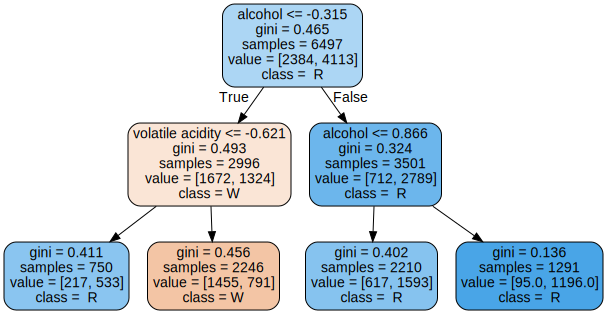

In [13]:
from graphviz import Source 
from sklearn.tree import export_graphviz

Source(export_graphviz(GridSearch.best_estimator_['clf'], feature_names= X.columns,
                       class_names=['W', ' R'],
                       rounded= True, filled = True))

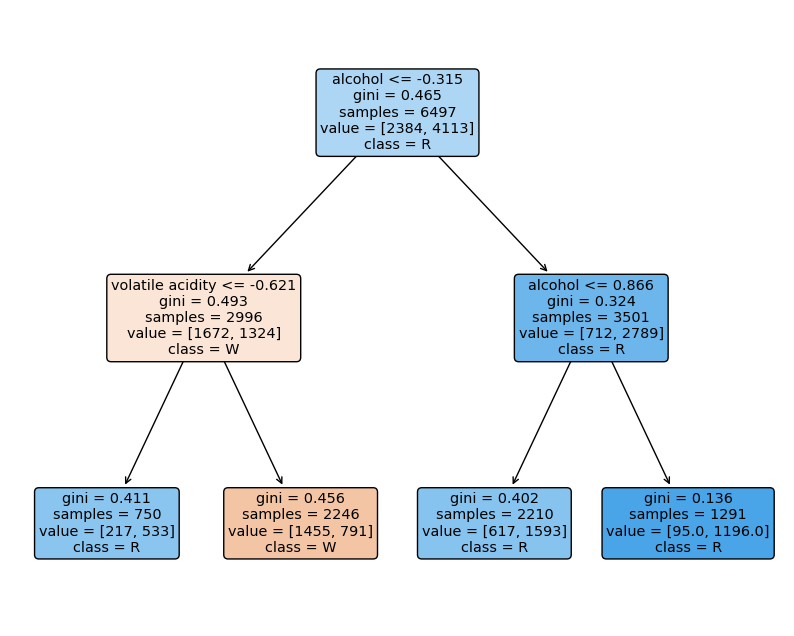

In [14]:
import matplotlib.pyplot as plt 
from sklearn import tree 

fig = plt.figure(figsize = (10,8))
_= tree.plot_tree(GridSearch.best_estimator_['clf'],
                   feature_names= X.columns,
                   class_names = ['W','R'],
                   rounded=True, filled = True)

### 성능 결과 정리

In [15]:
import pandas as pd 

score_df = pd.DataFrame(GridSearch.cv_results_)
score_df[['params', 'rank_test_score', 'mean_test_score', 'std_test_score']]

,params,rank_test_score,mean_test_score,std_test_score
0,{'clf__max_depth': 2},1,0.688800,0.071799
1,{'clf__max_depth': 4},2,0.663565,0.083905
2,{'clf__max_depth': 7},3,0.653408,0.086993
3,{'clf__max_depth': 10},4,0.644016,0.076915
